In [8]:
# This cell makes sure modules are auto-loaded when you change external python files
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# If you are working in Colab, then consider mounting folder to your drive
from google.colab import drive
drive.mount('/content/drive')

# Direct to your folder.
%cd /content/drive/MyDrive/computer_vision/diffusion_models/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/computer_vision/diffusion_models


In [10]:
import torch
from torchvision import datasets, transforms


transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),  # Repeat the single channel three times
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize all three channels
])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True)

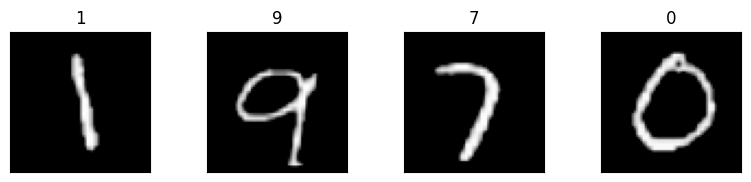

In [11]:
import matplotlib.pyplot as plt
import numpy as np

dataiter = iter(trainloader)
images, labels = next(dataiter)
images = images.numpy()

images = np.transpose(images, (0, 2, 3, 1))
images = np.clip(images, 0, 1)

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(4):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx])
    ax.set_title(str(labels[idx].item()))

plt.show()

In [6]:
from ddpm import Diffusion, Trainer, UNet
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
unet = UNet(in_channels=3, out_channels=3, timestep_dim=2, device=device)
diffusion = Diffusion(noise_steps=16, beta_start=1e-4, beta_end=0.02, img_size=next(iter(trainloader))[0].shape[-1], device=device)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(unet.parameters(), lr=1e-3)

trainer = Trainer(model=unet,
                  diffusion=diffusion,
                  optimizer=optimizer,
                  criterion=criterion,
                  trainloader=trainloader,
                  save_path='mnist_ddpm.pth',
                  device=device)

Epoch 1/9 - Loss: 0.0161: 100%|██████████| 15000/15000 [12:29<00:00, 20.01it/s]


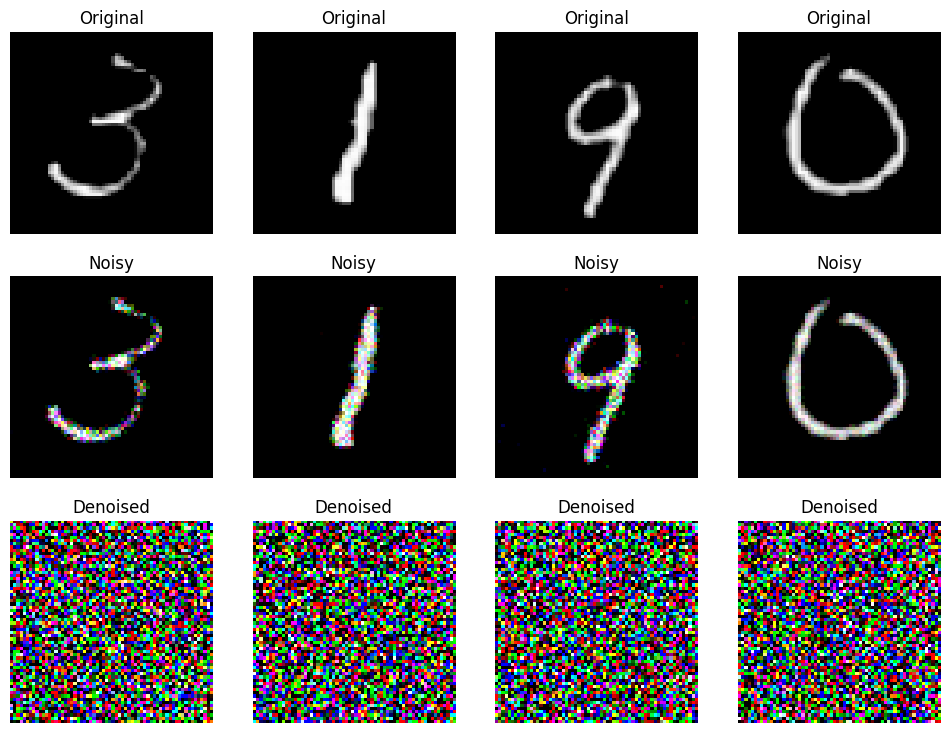

Epoch 2/9 - Loss: 0.0204: 100%|██████████| 15000/15000 [12:32<00:00, 19.93it/s]


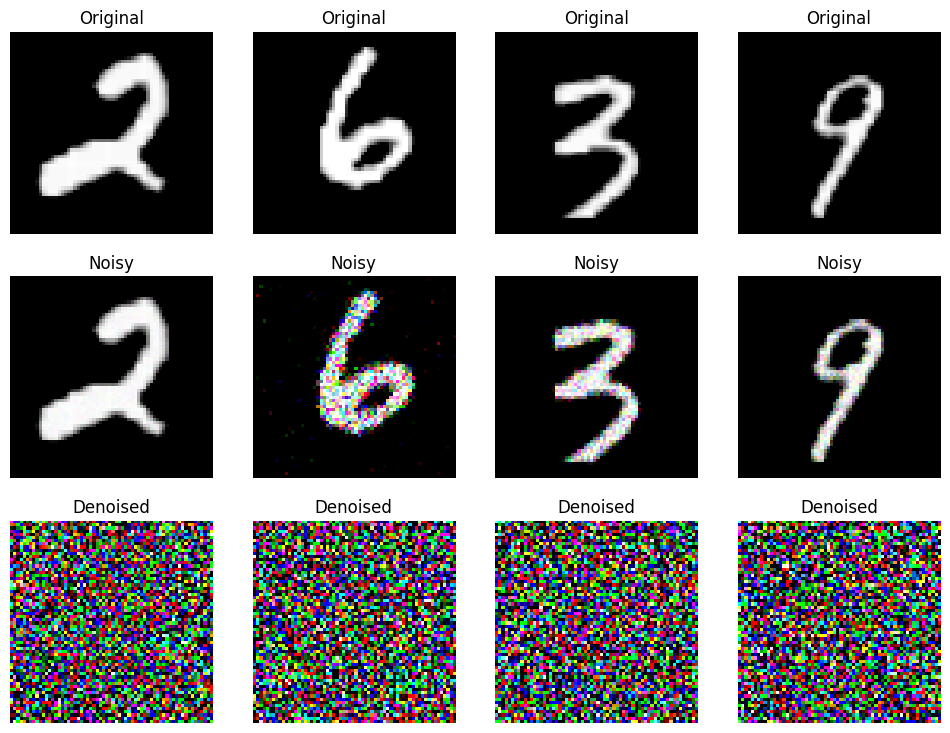

Epoch 3/9 - Loss: 0.0157: 100%|██████████| 15000/15000 [12:36<00:00, 19.84it/s]


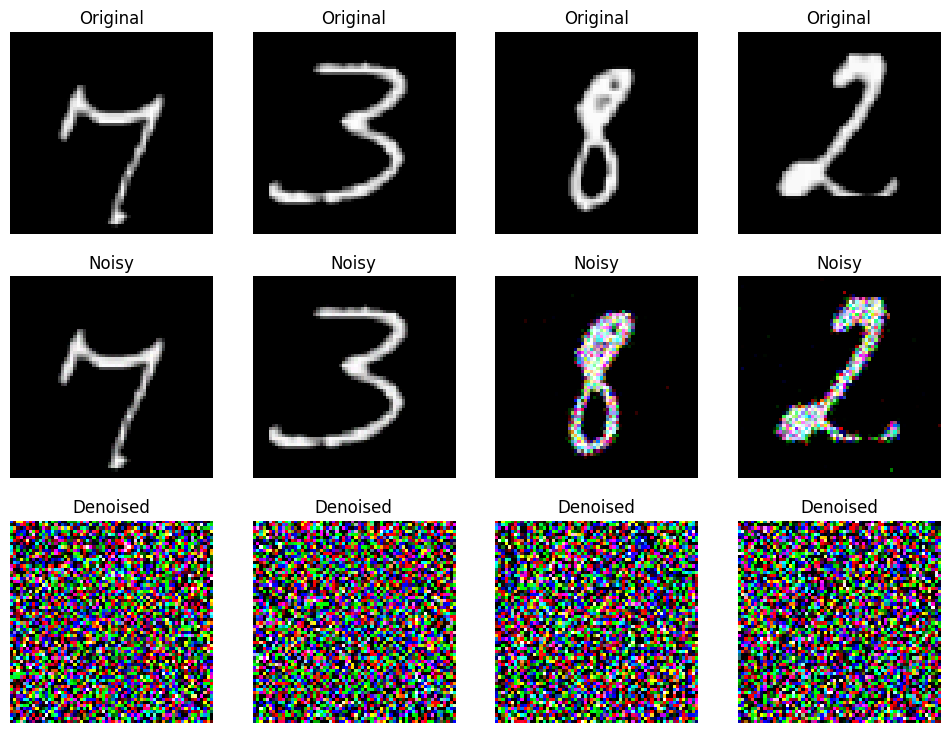

Epoch 4/9 - Loss: 0.0092: 100%|██████████| 15000/15000 [12:36<00:00, 19.83it/s]


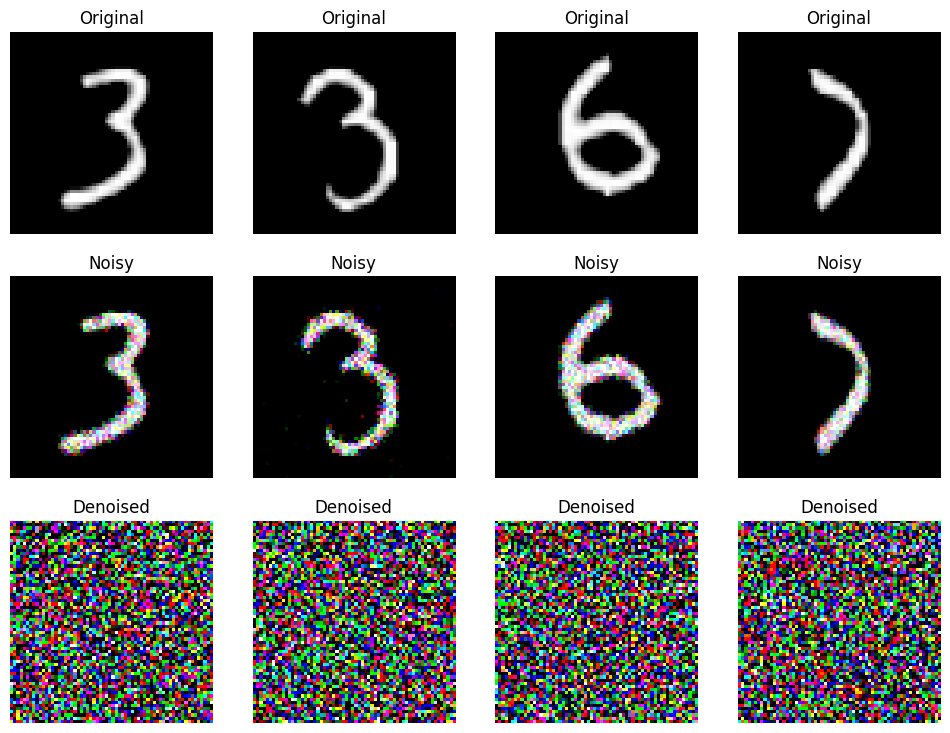

Epoch 5/9 - Loss: 0.0101: 100%|██████████| 15000/15000 [12:38<00:00, 19.78it/s]


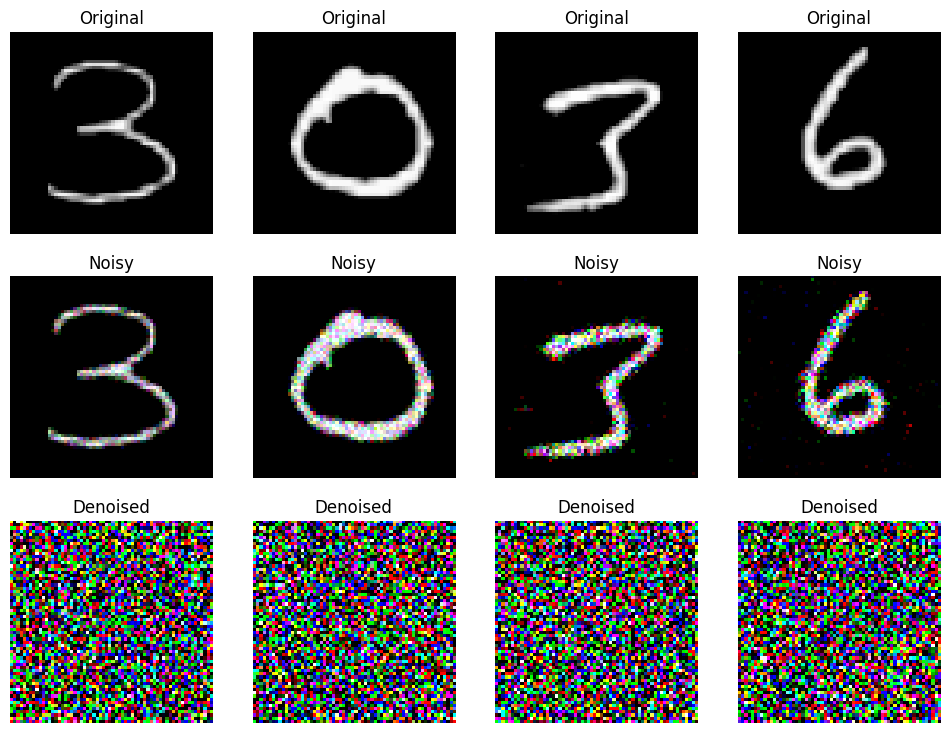

Epoch 6/9 - Loss: 0.0084: 100%|██████████| 15000/15000 [12:37<00:00, 19.80it/s]


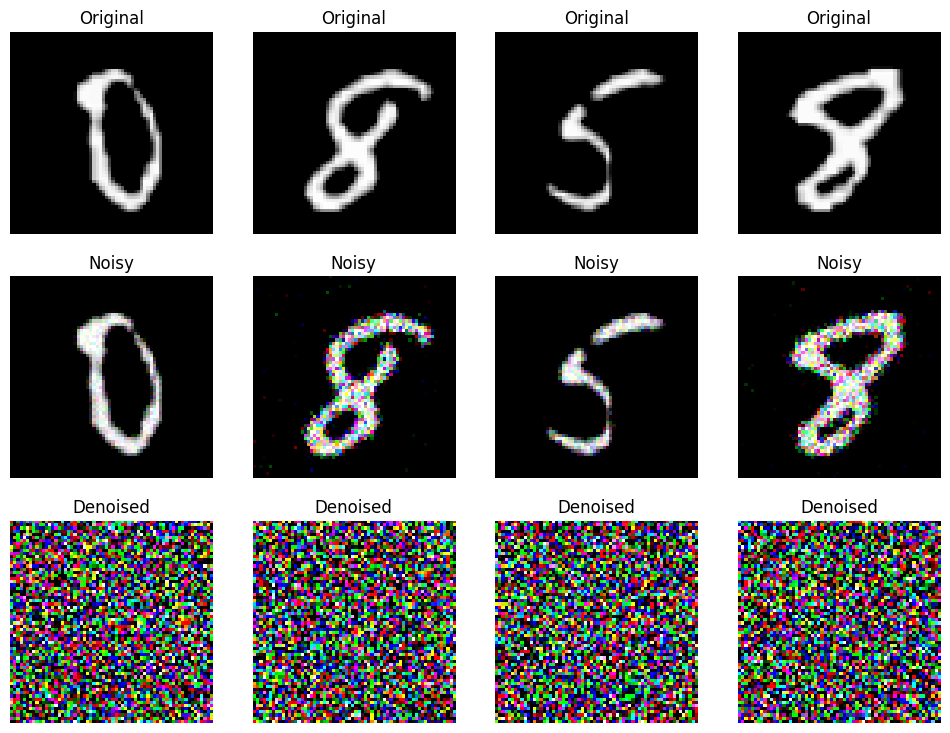

Epoch 7/9 - Loss: 0.0089: 100%|██████████| 15000/15000 [12:35<00:00, 19.86it/s]


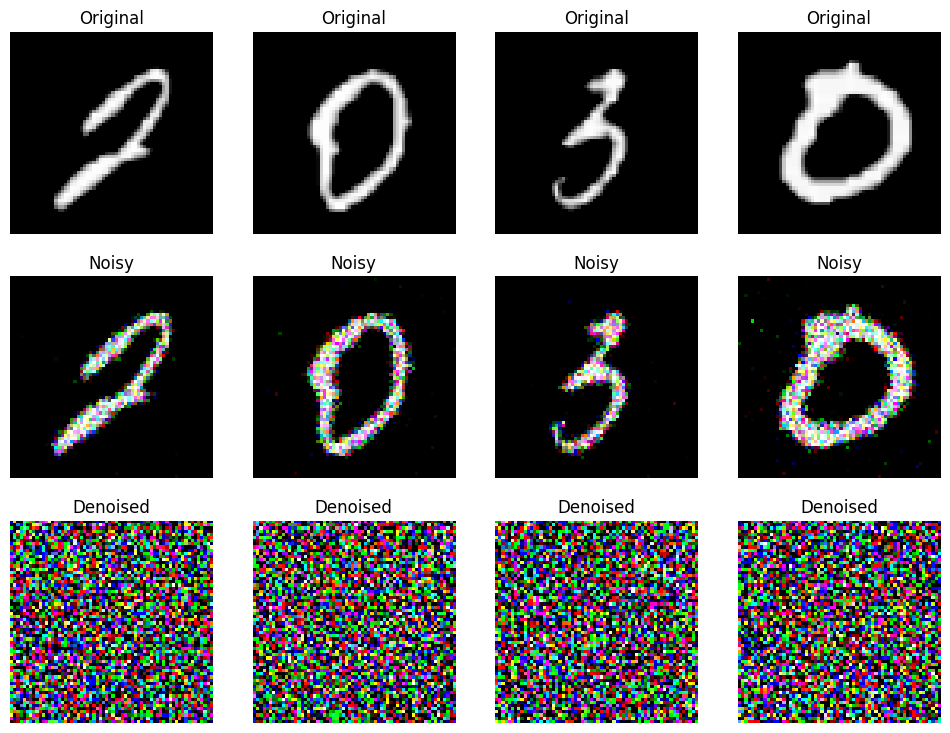

Epoch 8/9 - Loss: 0.0181: 100%|██████████| 15000/15000 [12:37<00:00, 19.81it/s]


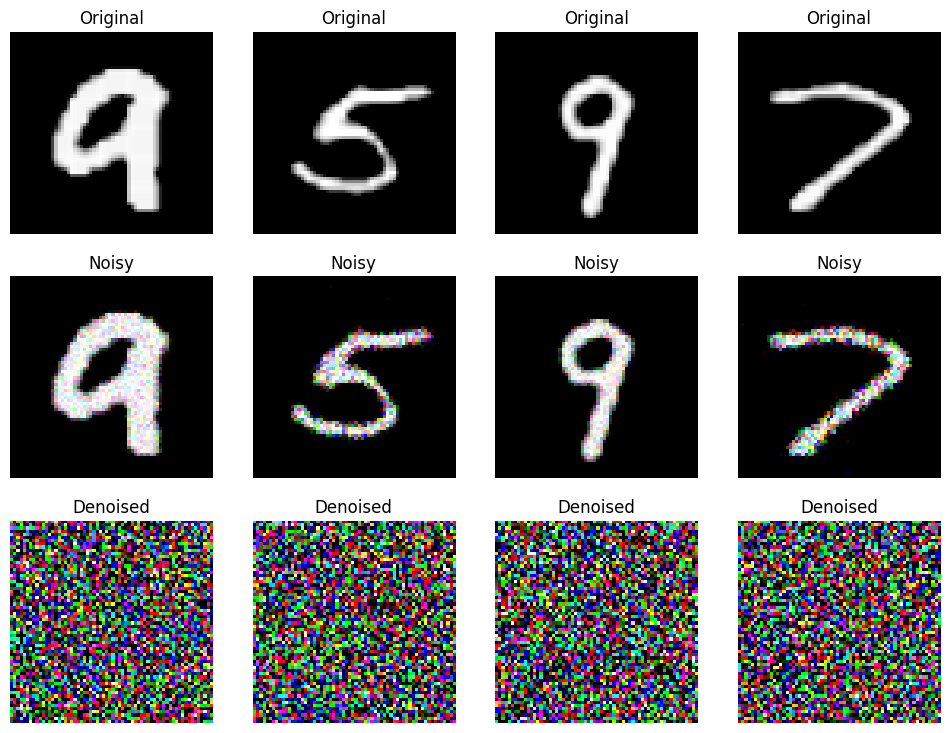

Epoch 9/9 - Loss: 0.0083: 100%|██████████| 15000/15000 [12:35<00:00, 19.85it/s]


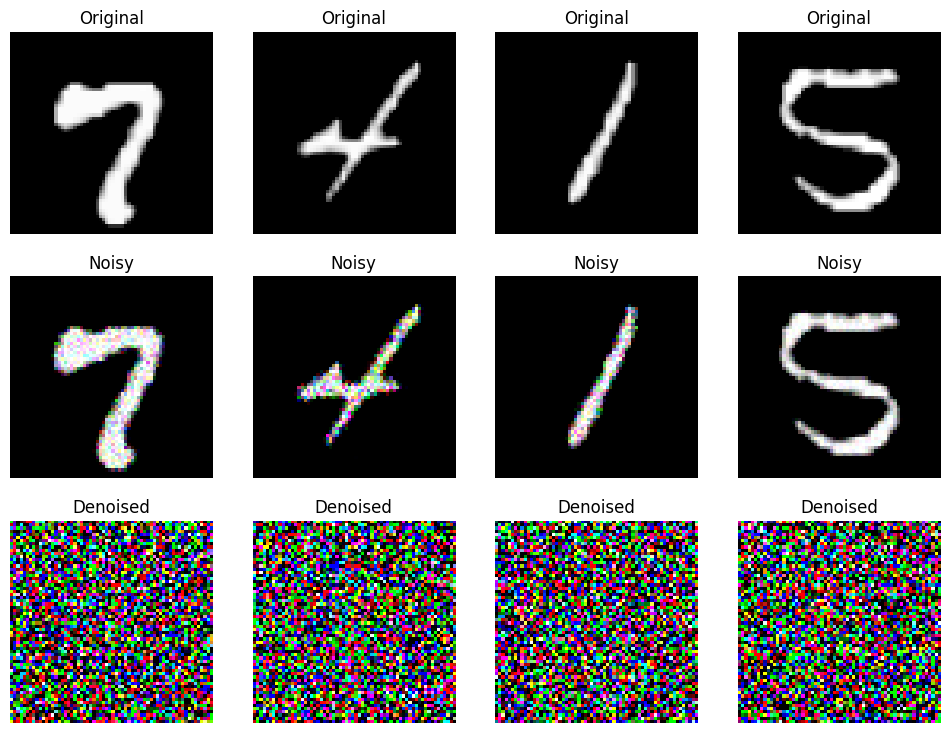

Training complete


In [12]:
trainer.train_model(epochs=9)